<a href="https://colab.research.google.com/github/Kaushal28/ML/blob/develop/PCA_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from numpy import linalg as LA
from matplotlib import pyplot as plt

In [0]:
# sample random dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([10, 10, 12, 13, 14, 15, 16, 17, 19, 19])

x_mean = np.mean(X)
y_mean = np.mean(y)

print ('Mean of X: {0}\nMean of y: {1}'.format(x_mean, y_mean))

# center the data
X = X - x_mean
y = y - y_mean

#define this data as a single matrix
data_matrix = np.array([X, y])

print (X, y)

Mean of X: 5.5
Mean of y: 14.5
[-4.5 -3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5  4.5] [-4.5 -4.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  4.5  4.5]


Covariance matrix:
[[ 9.16666667  9.94444444]
 [ 9.94444444 10.94444444]]
Eigen Values:
[20.03964784  0.07146327]
Eigen Vectors:
[[ 0.6748961   0.73791277]
 [-0.73791277  0.6748961 ]]


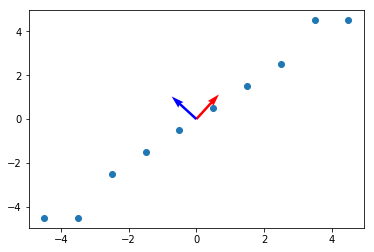

In [0]:
# calculate covariance matrix
cov_matrix = np.cov(X, y)
print ('Covariance matrix:\n{0}'.format(cov_matrix))

# calculate eigen vactors and eigen values
eig_values, eig_vectors = LA.eigh(cov_matrix)

# eigh gives the array in ascending order sorted, In PCA we need highest eigen values so reverse the arrays
eig_values = eig_values[::-1]
eig_vectors = eig_vectors[::-1]

#print the eigen valus and eigen vectors
print ('Eigen Values:\n{0}'.format(eig_values))
print ('Eigen Vectors:\n{0}'.format(eig_vectors))

#plot the graph
origin = [0], [0]
plt.quiver(*origin, eig_vectors[:, 0], eig_vectors[:, 1], color = ['r', 'b'], scale = 10)
plt.scatter(X, y)
plt.show()

In [0]:
# returns first n principal components
def get_n_components(n, eig_vectors):
    return eig_vectors[:n, :]

In [0]:
principal_components = get_n_components(1, eig_vectors)
print ('Shape of Principal Components matrix: {0}'.format(principal_components.shape))
print ('Shape of data matrix: {0}'.format(data_matrix.shape))

Shape of Principal Components matrix: (1, 2)
Shape of data matrix: (2, 10)


In [0]:
# Transfor the original data set to reduced dimensions defined by its principal components
transformed_data = np.matmul(principal_components, data_matrix)
print (transformed_data)

[[-6.35763991 -5.68274381 -3.53202217 -2.1192133  -0.70640443  0.70640443
   2.1192133   3.53202217  5.68274381  6.35763991]]


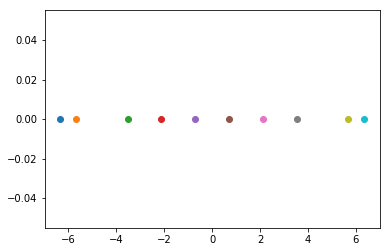

In [0]:
# Plot the transformed data. It's 1D.
plt.plot(transformed_data, np.zeros_like(transformed_data), 'o')
plt.show()

[array([1.20925364, 1.66473838, 3.11625202, 4.06975121, 5.0232504 ,
       5.9767496 , 6.93024879, 7.88374798, 9.33526162, 9.79074636]), array([ 9.80861632, 10.30663077, 11.89367573, 12.93620544, 13.97873515,
       15.02126485, 16.06379456, 17.10632427, 18.69336923, 19.19138368])]


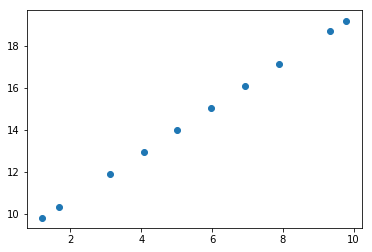

In [0]:
# Getting the original data back
original_data_retrieved = np.matmul(principal_components.T, transformed_data)
original_data_transformed = [original_data_retrieved[0]+ x_mean, original_data_retrieved[1] + y_mean]
print (original_data_transformed)

#Plot the original data
plt.scatter(original_data_transformed[0], original_data_transformed[1])
plt.show()

In [0]:
# Using sklearns PCA for comparision
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)

xy_pair = []
for i, j in zip(X, y):
    xy_pair.append([i, j])

sklearns_transformed_data = pca.fit_transform(xy_pair)
print ('sklearns transformed data:\n{0}'.format(sklearns_transformed_data))
print ('Our data:\n{0}'.format(transformed_data.T))

sklearns transformed data:
[[ 6.35763991]
 [ 5.68274381]
 [ 3.53202217]
 [ 2.1192133 ]
 [ 0.70640443]
 [-0.70640443]
 [-2.1192133 ]
 [-3.53202217]
 [-5.68274381]
 [-6.35763991]]
Our data:
[[-6.35763991]
 [-5.68274381]
 [-3.53202217]
 [-2.1192133 ]
 [-0.70640443]
 [ 0.70640443]
 [ 2.1192133 ]
 [ 3.53202217]
 [ 5.68274381]
 [ 6.35763991]]
